## 1. Data Exploration and Cleaning:


---



In [5]:
import pandas as pd

# Load the data
data = pd.read_csv("clinical_trial_data.csv")

# Explore basic information
data.head()
data.shape
data.dtypes



Age                       float64
Gender                     object
Treatment                  object
HbA1c                     float64
Weight                    float64
Treatment_Group             int64
HbA1c_Change              float64
Adverse_Event              object
Adverse_Event_Severity     object
dtype: object

In [6]:
data.shape


(300, 9)

In [7]:
data.dtypes


Age                       float64
Gender                     object
Treatment                  object
HbA1c                     float64
Weight                    float64
Treatment_Group             int64
HbA1c_Change              float64
Adverse_Event              object
Adverse_Event_Severity     object
dtype: object

In [8]:
data.isnull().sum()


Age                       0
Gender                    0
Treatment                 0
HbA1c                     0
Weight                    0
Treatment_Group           0
HbA1c_Change              0
Adverse_Event             0
Adverse_Event_Severity    0
dtype: int64

<Axes: >

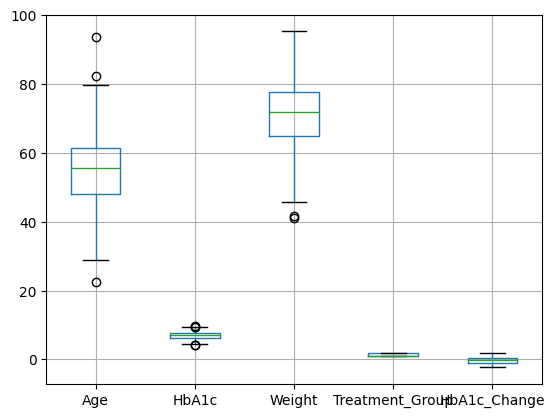

In [19]:
#  outliers checking
data.boxplot()

In [10]:
data.head()

,Age,Gender,Treatment,HbA1c,Weight,Treatment_Group,HbA1c_Change,Adverse_Event,Adverse_Event_Severity
0,59.967142,Male,Placebo,5.330595,64.827115,2,0.517042,Dizziness,Moderate
1,53.617357,Female,Drug,7.543360,84.093474,1,-1.384987,Dizziness,Mild
2,61.476885,Female,Drug,6.337376,92.988981,2,-0.883107,Dizziness,Mild
3,70.230299,Male,Drug,7.570599,66.371614,1,-1.777948,Nausea,Moderate
4,52.658466,Male,Placebo,6.236741,65.544975,2,0.665440,Dizziness,Moderate


##2. Analysis of Primary Endpoint:
Statistical Tests:

In [11]:
import scipy.stats as stats

# Filter data for drug and placebo groups
hba1c_change_drug = data[data['Treatment'] == 'Drug']['HbA1c_Change']
hba1c_change_placebo = data[data['Treatment'] == 'Placebo']['HbA1c_Change']

# Compare HbA1c changes between groups
t_test_result = stats.ttest_ind(hba1c_change_drug, hba1c_change_placebo)
print(t_test_result)

# Calculate effect size
cohens_d = (hba1c_change_drug.mean() - hba1c_change_placebo.mean()) / hba1c_change_drug.std(ddof=1)
print(cohens_d)

TtestResult(statistic=-24.673315990599082, pvalue=5.5112799630104645e-74, df=298.0)
-2.7803076446901134


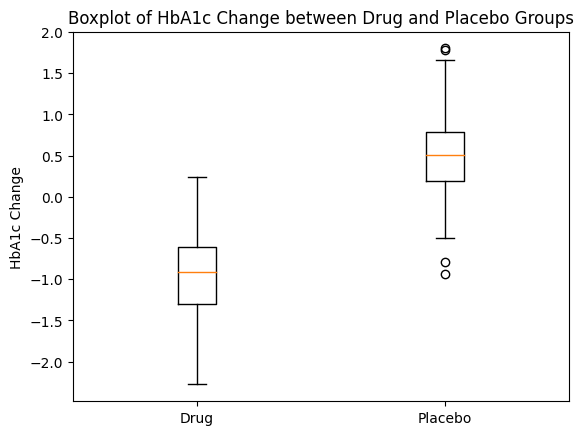

{'bodies': [<matplotlib.collections.PolyCollection at 0x7a8adf7b1450>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7a8adf7b13c0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7a8adf7b1cc0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7a8adf7b2050>}

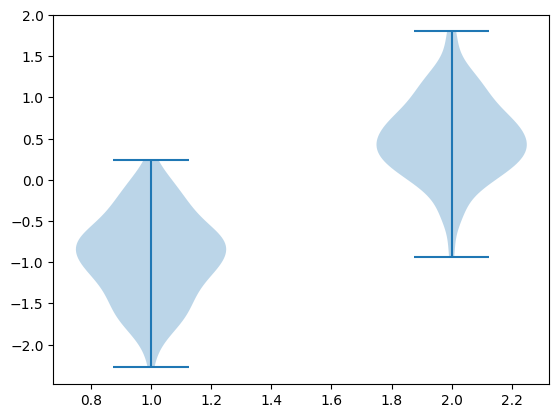

In [12]:
import matplotlib.pyplot as plt

# Convert Series to arrays
hba1c_change_drug_array = hba1c_change_drug.values
hba1c_change_placebo_array = hba1c_change_placebo.values

# Create boxplot
plt.boxplot([hba1c_change_drug_array, hba1c_change_placebo_array])
plt.xticks([1, 2], ['Drug', 'Placebo'])
plt.ylabel('HbA1c Change')
plt.title('Boxplot of HbA1c Change between Drug and Placebo Groups')
plt.show()

plt.violinplot([hba1c_change_drug_array, hba1c_change_placebo_array])

###4. Exploring Subgroups and Heterogeneity:



In [13]:
# Create subgroups based on patient characteristics
age_groups = pd.cut(data["Age"], bins=[20, 40, 60, 80])
treatment_effect_by_age = data.groupby(["Treatment", age_groups])["HbA1c_Change"].mean()
print(treatment_effect_by_age)


Treatment  Age     
Drug       (20, 40]   -0.961105
           (40, 60]   -0.973702
           (60, 80]   -0.774477
Placebo    (20, 40]    0.434970
           (40, 60]    0.512740
           (60, 80]    0.523980
Name: HbA1c_Change, dtype: float64


In [14]:
from statsmodels.formula.api import ols

# Assuming 'age_groups' is a categorical variable
# Interaction term between 'Treatment' and 'age_groups'
model = ols("HbA1c_Change ~ Treatment : age_groups", data=data).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           HbA1c_Change   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     124.4
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           3.24e-70
Time:                        12:47:28   Log-Likelihood:                -212.44
No. Observations:                 298   AIC:                             436.9
Df Residuals:                     292   BIC:                             459.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

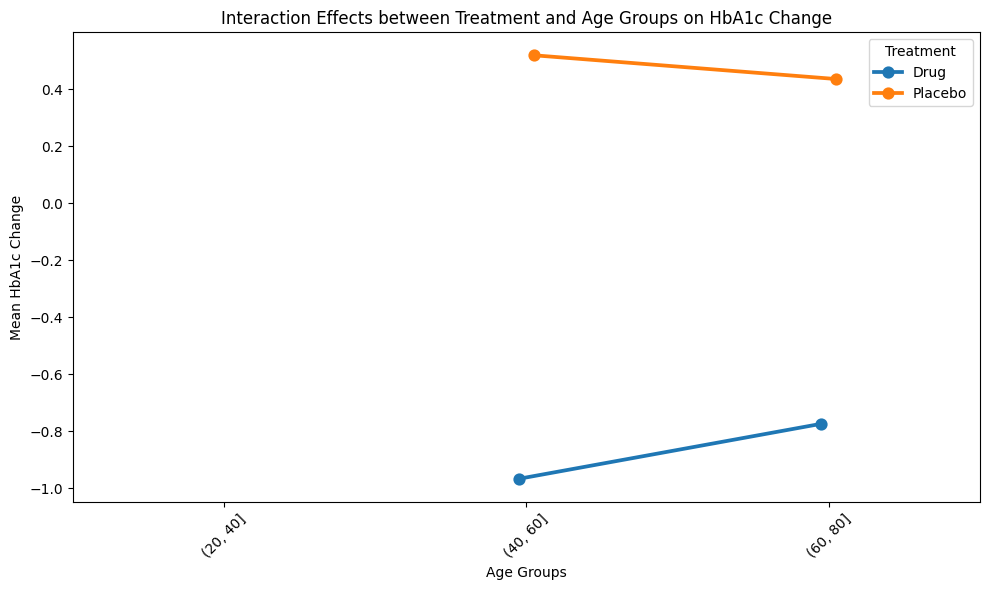

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the interaction effects
plt.figure(figsize=(10, 6))

# Grouping data by treatment and age groups and calculating mean HbA1c change
grouped_data = data.groupby(['Treatment', age_groups])['HbA1c_Change'].mean().reset_index()

# Plotting the interaction effects
sns.pointplot(data=grouped_data, x=age_groups, y='HbA1c_Change', hue='Treatment', dodge=True)

# Adding labels and title
plt.xlabel('Age Groups')
plt.ylabel('Mean HbA1c Change')
plt.title('Interaction Effects between Treatment and Age Groups on HbA1c Change')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.legend(title='Treatment')
plt.tight_layout()
plt.show()


In [16]:
adverse_events_drug = data[data["Treatment"] == "Drug"]["Adverse_Event"].value_counts()
adverse_events_placebo = data[data["Treatment"] == "Placebo"]["Adverse_Event"].value_counts()
print(adverse_events_drug, adverse_events_placebo)


Fatigue      36
Dizziness    35
Headache     30
Insomnia     25
Nausea       24
Name: Adverse_Event, dtype: int64 Dizziness    38
Nausea       38
Fatigue      27
Headache     24
Insomnia     23
Name: Adverse_Event, dtype: int64


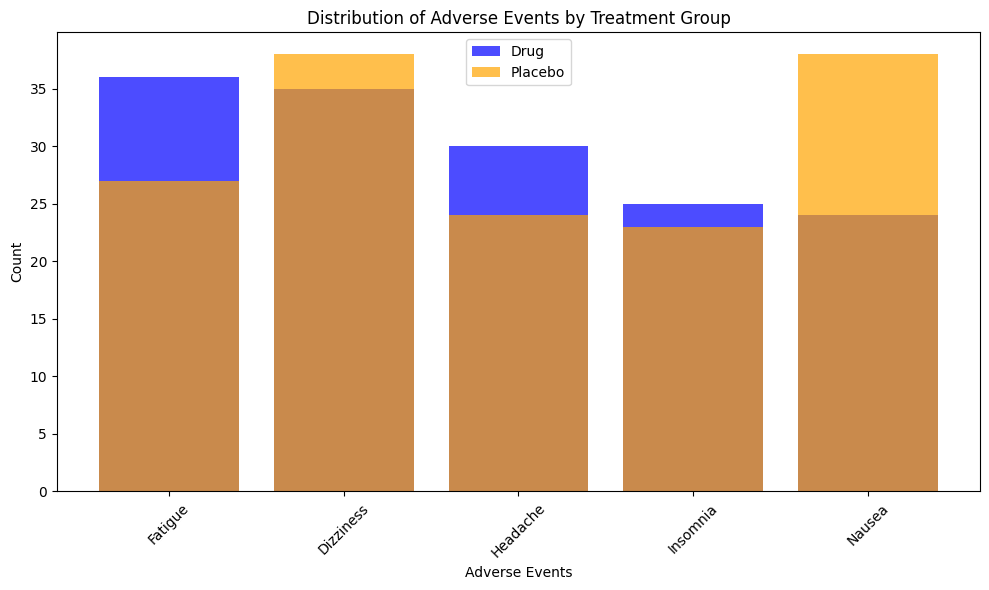

In [17]:
import matplotlib.pyplot as plt

# Plotting the distribution of adverse events for the drug and placebo treatment groups
plt.figure(figsize=(10, 6))

# Plotting adverse events for the drug treatment group
plt.bar(adverse_events_drug.index, adverse_events_drug.values, color='blue', alpha=0.7, label='Drug')

# Plotting adverse events for the placebo treatment group
plt.bar(adverse_events_placebo.index, adverse_events_placebo.values, color='orange', alpha=0.7, label='Placebo')

# Adding labels and title
plt.xlabel('Adverse Events')
plt.ylabel('Count')
plt.title('Distribution of Adverse Events by Treatment Group')
plt.xticks(rotation=45)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()


##Statistical Tests

In [18]:
# Chi-squared test for comparing frequencies
chi2_result = stats.chi2_contingency(
    pd.crosstab(data["Treatment"], data["Adverse_Event"])
)
print(chi2_result)


Chi2ContingencyResult(statistic=5.320292279527807, pvalue=0.2559833017291427, dof=4, expected_freq=array([[36.5, 31.5, 27. , 24. , 31. ],
       [36.5, 31.5, 27. , 24. , 31. ]]))
